In [1]:
import os

import pandas as pd
import requests
from plotly import __version__
from plotly import graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode , iplot , plot

print(__version__)

init_notebook_mode(connected=True)

def plotly_pd(df, title=''):
    data = []
    
    for column in df.columns:
        trace = go.Scatter(x=df.index, y=df[column], mode='lines', name=column)
        data.append(trace)
        
    layout = dict(title=title)
    fig = dict(data=data, layout=layout)
    iplot(fig,show_link=False)

import warnings

warnings.filterwarnings("ignore")

5.4.0


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/wiki_machine_learning.csv',sep=' ')
df = df[df['count']!=0]
df

,date,count,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning
...,...,...,...,...,...,...,...
382,2016-01-16,1644,en,Machine_learning,8708,201601,Machine_learning
381,2016-01-17,1836,en,Machine_learning,8708,201601,Machine_learning
376,2016-01-18,2983,en,Machine_learning,8708,201601,Machine_learning
375,2016-01-19,3389,en,Machine_learning,8708,201601,Machine_learning


In [3]:
df.date = pd.to_datetime(df.date)

In [4]:
plotly_pd(df.set_index('date')[['count']])

In [5]:
from fbprophet import Prophet
from fbprophet.diagnostics import performance_metrics , cross_validation

In [6]:
predictions = 30

df = df[['date','count']]
df.columns = ['ds','y']
train_df = df[:-predictions].copy()
train_df

,ds,y
81,2015-01-01,1414
80,2015-01-02,1920
79,2015-01-03,1338
78,2015-01-04,1404
77,2015-01-05,2264
...,...,...
358,2015-12-17,2870
363,2015-12-18,2475
364,2015-12-19,1659
344,2015-12-20,1534


In [7]:
m = Prophet()
m.fit(train_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
future = m.make_future_dataframe(periods=predictions)
future.tail()

,ds
378,2016-01-16
379,2016-01-17
380,2016-01-18
381,2016-01-19
382,2016-01-20


In [9]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
378,2016-01-16,2971.125440,1716.286526,2517.030170,2953.074105,2990.741630,-861.666255,-861.666255,-861.666255,-861.666255,-861.666255,-861.666255,0.0,0.0,0.0,2109.459185
379,2016-01-17,2976.423576,1864.618544,2693.528438,2957.203955,2997.564498,-720.685978,-720.685978,-720.685978,-720.685978,-720.685978,-720.685978,0.0,0.0,0.0,2255.737598
380,2016-01-18,2981.721713,2866.480705,3656.872318,2961.474774,3004.349990,281.426215,281.426215,281.426215,281.426215,281.426215,281.426215,0.0,0.0,0.0,3263.147928
381,2016-01-19,2987.019849,3119.858624,3946.043527,2965.233260,3010.800731,541.366440,541.366440,541.366440,541.366440,541.366440,541.366440,0.0,0.0,0.0,3528.386289
382,2016-01-20,2992.317986,3002.045365,3827.774969,2969.337771,3017.921098,425.464520,425.464520,425.464520,425.464520,425.464520,425.464520,0.0,0.0,0.0,3417.782506


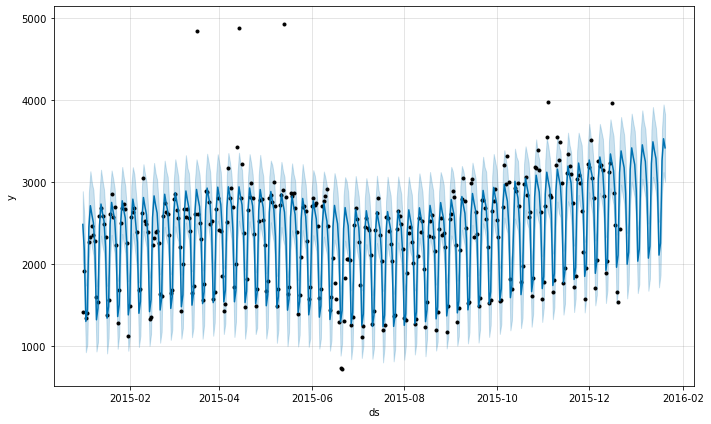

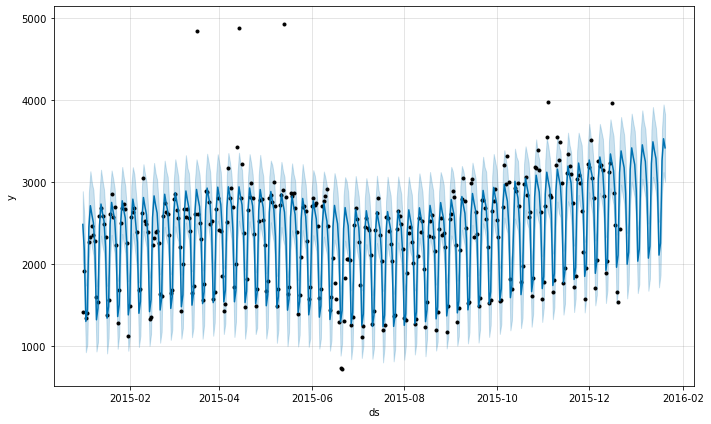

In [10]:
m.plot(forecast)

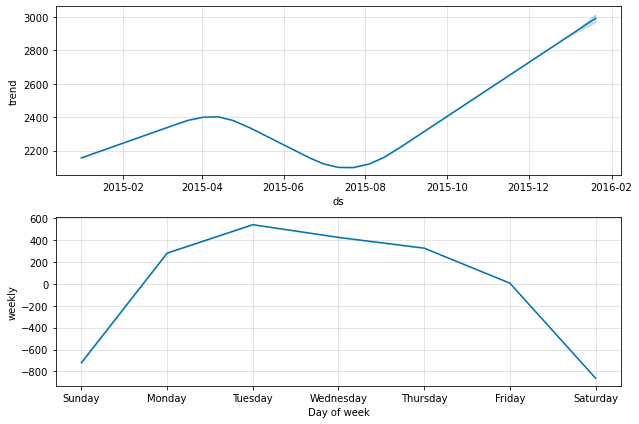

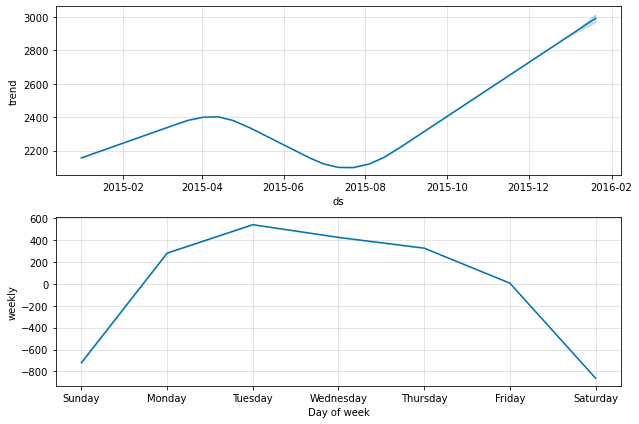

In [11]:
m.plot_components(forecast)

In [12]:
cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(df.set_index('ds'))

import numpy as np

cmp_df['e'] = cmp_df['y'] - cmp_df['yhat']
cmp_df['p'] = 100*cmp_df['e'] / cmp_df['y']

print('MAPE = ',round(np.mean(abs(cmp_df[-predictions:]['p'])),2))
print('MAE = ',round(np.mean(abs(cmp_df[-predictions:]['e'])),2))


MAPE =  34.19
MAE =  593.37


In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
plt.rcParams['figure.figsize'] = (15, 10)

Dickey-Fuller test: p=0.107392


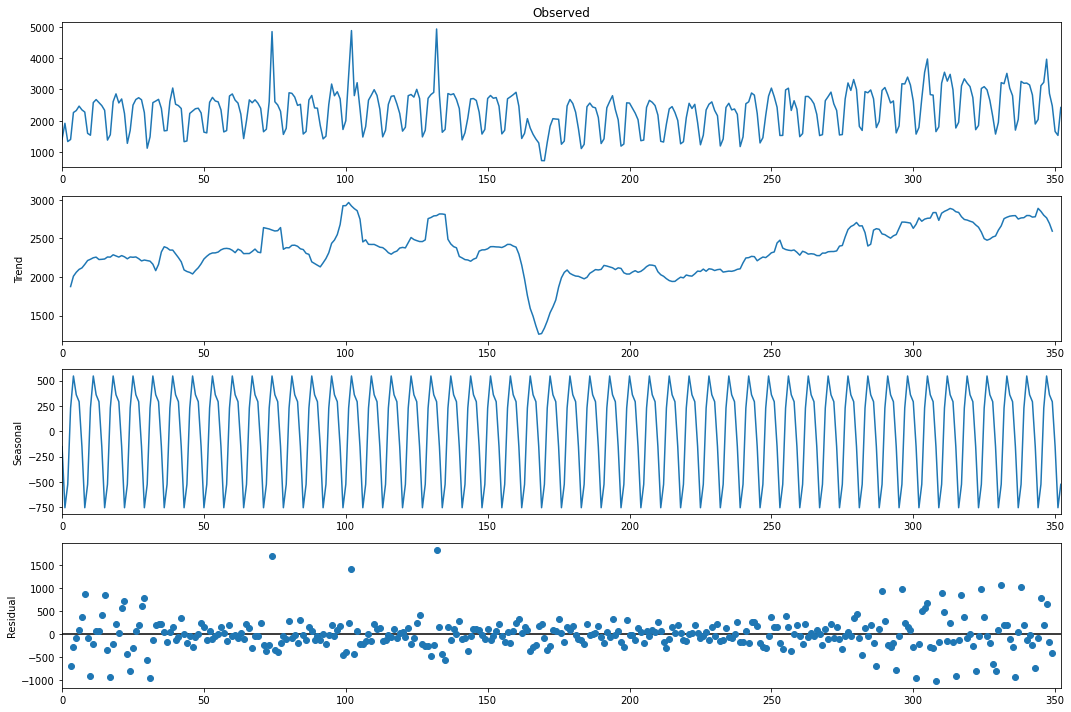

In [14]:
sm.tsa.seasonal_decompose(train_df['y'].values ,freq=7).plot()
print("Dickey-Fuller test: p=%f" % sm.tsa.stattools.adfuller(train_df['y'])[1])

In [15]:
train_df.set_index('ds',inplace=True)
train_df

,y
ds,
2015-01-01,1414
2015-01-02,1920
2015-01-03,1338
2015-01-04,1404
2015-01-05,2264
...,...
2015-12-17,2870
2015-12-18,2475
2015-12-19,1659


Dickey-Fuller test: p=0.000000


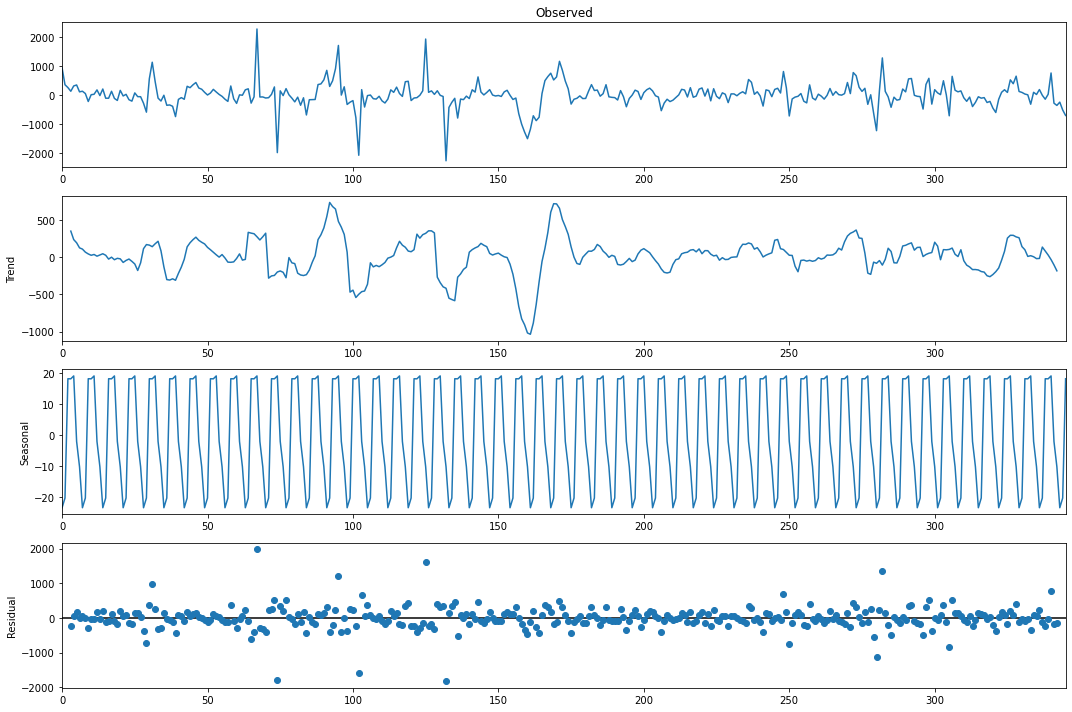

In [16]:
train_df['y_diff'] = train_df.y - train_df.y.shift(7)
sm.tsa.seasonal_decompose(train_df.y_diff[7:].values,freq=7).plot()
print("Dickey-Fuller test: p=%f" % sm.tsa.stattools.adfuller(train_df.y_diff[8:])[1])

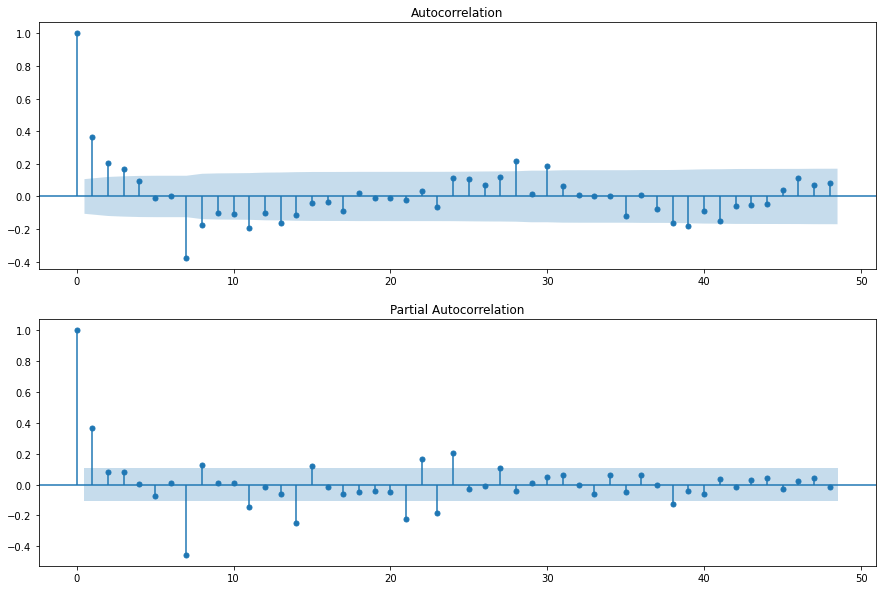

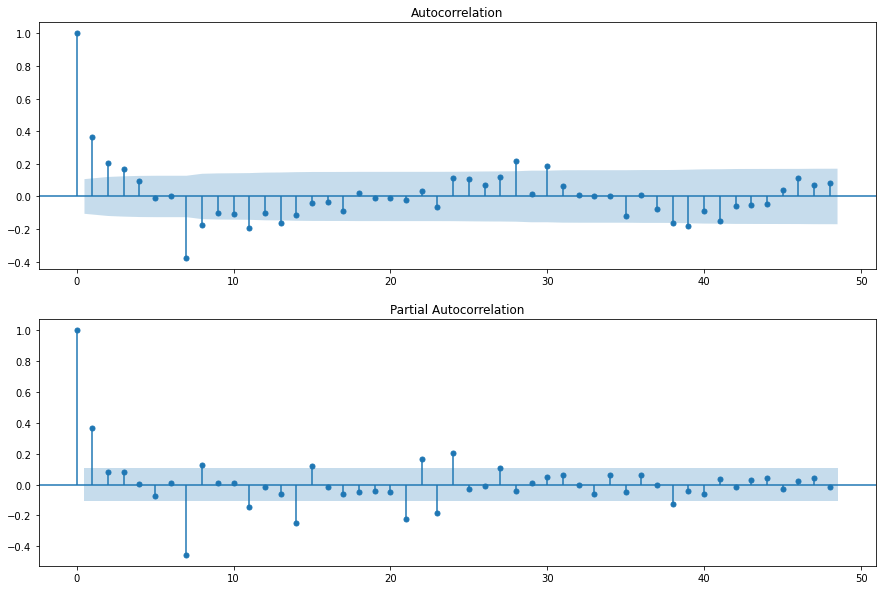

In [17]:
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(train_df.y_diff[13:].values.squeeze(), lags=48 ,ax=ax)

ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(train_df.y_diff[13:].values.squeeze(), lags=48 ,ax=ax)

In [18]:
ps = range(0, 2)
ds = range(0, 2)
qs = range(0, 4)
Ps = range(0, 4)
Ds = range(0, 3)
Qs = range(0, 2)

In [19]:
from itertools import product

parameters = product(ps,ds,qs,Ps,Ds,Qs)
parameters_list = list(parameters)
len(parameters_list)

384

In [20]:
%%time
import warnings
from tqdm import tqdm
results1 = []
best_aic = float("inf")
warnings.filterwarnings('ignore')

for param in tqdm(parameters_list):
    #try except is necessary, because on some sets of parameters the model can not be trained
    try:
        model=sm.tsa.statespace.SARIMAX(train_df['y'], order=(param[0], param[1], param[2]), 
                                        seasonal_order=(param[3], param[4], param[5], 7)).fit(disp=-1)
    #print parameters on which the model is not trained and proceed to the next set
    except (ValueError, np.linalg.LinAlgError):
        continue
    aic = model.aic
    #save the best model, aic, parameters
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results1.append([param, model.aic])

100%|████████████████████████████████████████████████████████████████████████████████| 384/384 [12:47<00:00,  2.00s/it]

Wall time: 12min 47s


In [21]:
result_table1 = pd.DataFrame(results1)
result_table1.columns = ['parameters','aic']
result_table1.sort_values(by = 'aic',ascending=True)

,parameters,aic
42,"(0, 0, 1, 3, 0, 0)",10.000000
347,"(1, 1, 2, 1, 2, 1)",12.000000
139,"(0, 1, 1, 3, 0, 1)",12.000000
331,"(1, 1, 1, 3, 0, 1)",14.000000
90,"(0, 0, 3, 3, 0, 0)",14.000000
...,...,...
67,"(0, 0, 2, 3, 0, 1)",6014.905974
24,"(0, 0, 1, 0, 0, 0)",6114.489104
1,"(0, 0, 0, 0, 0, 1)",6137.441151
85,"(0, 0, 3, 2, 0, 1)",6147.022217


In [22]:
result_table1[result_table1['parameters'].isin([(1, 0, 2, 3, 1, 0),
                                                (1, 1, 2, 3, 2, 1),
                                                (1, 1, 2, 3, 1, 1),
                                                (1, 0, 2, 3, 0, 0)])]

,parameters,aic
258,"(1, 0, 2, 3, 0, 0)",5183.740049
260,"(1, 0, 2, 3, 1, 0)",5022.312524
356,"(1, 1, 2, 3, 1, 1)",5019.555903
358,"(1, 1, 2, 3, 2, 1)",4988.964681


In [23]:
import scipy.stats
train_df['y_box'], lmbda = scipy.stats.boxcox(train_df['y']) 
print("The optimal Box-Cox transformation parameter: %f" % lmbda)

The optimal Box-Cox transformation parameter: 0.732841


In [24]:
results2 = []
best_aic = float("inf")

for param in tqdm(parameters_list):
    #try except is necessary, because on some sets of parameters the model can not be trained
    try:
        model=sm.tsa.statespace.SARIMAX(train_df['y_box'], order=(param[0], param[1], param[2]), 
                                        seasonal_order=(param[3], param[4], param[5], 7)).fit(disp=-1)
    #print parameters on which the model is not trained and proceed to the next set
    except (ValueError, np.linalg.LinAlgError):
        continue
    aic = model.aic
    #save the best model, aic, parameters
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results2.append([param, model.aic])
    
warnings.filterwarnings('default')

100%|████████████████████████████████████████████████████████████████████████████████| 384/384 [06:38<00:00,  1.04s/it]


In [25]:
result_table2 = pd.DataFrame(results2)
result_table2.columns = ['parameters','aic']
result_table2.sort_values(by = 'aic',ascending=True)

C:\Users\emely\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,parameters,aic
42,"(0, 0, 1, 3, 0, 0)",10.000000
269,"(1, 0, 3, 1, 0, 0)",12.000000
210,"(1, 0, 0, 3, 0, 1)",12.000000
357,"(1, 1, 2, 3, 2, 0)",14.000000
262,"(1, 0, 2, 3, 2, 1)",3528.650808
...,...,...
25,"(0, 0, 1, 0, 0, 1)",4575.009471
36,"(0, 0, 1, 2, 0, 0)",4667.465976
24,"(0, 0, 1, 0, 0, 0)",4825.590063
1,"(0, 0, 0, 0, 0, 1)",4860.099956


In [32]:
result_table2[result_table1['parameters'].isin([(1, 0, 2, 3, 1, 0),
                                                (1, 1, 2, 3, 2, 1),
                                                (1, 1, 2, 3, 1, 1),
                                                (1, 0, 2, 3, 0, 0)])].sort_values(by='aic')

,parameters,aic
358,"(1, 1, 2, 3, 2, 1)",3534.540192
260,"(1, 0, 2, 3, 1, 1)",3557.003105
356,"(1, 1, 2, 3, 1, 1)",3557.853074
258,"(1, 0, 2, 3, 0, 1)",3668.608280


In [33]:
print(best_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              y_box   No. Observations:                  353
Model:             SARIMAX(0, 0, 1)x(3, 0, [], 7)   Log Likelihood                   0.000
Date:                            Tue, 16 Nov 2021   AIC                             10.000
Time:                                    09:14:56   BIC                             29.332
Sample:                                         0   HQIC                            17.693
                                            - 353                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.0000         -0       -inf      0.000       1.000       1.000
ar.S.L7       -0.9996      0.000  -

C:\Users\emely\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

C:\Users\emely\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3108: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\emely\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:677: RuntimeWarning:

invalid value encountered in true_divide



Student's test: p=0.000000
Dickey-Fuller test: p=0.119300


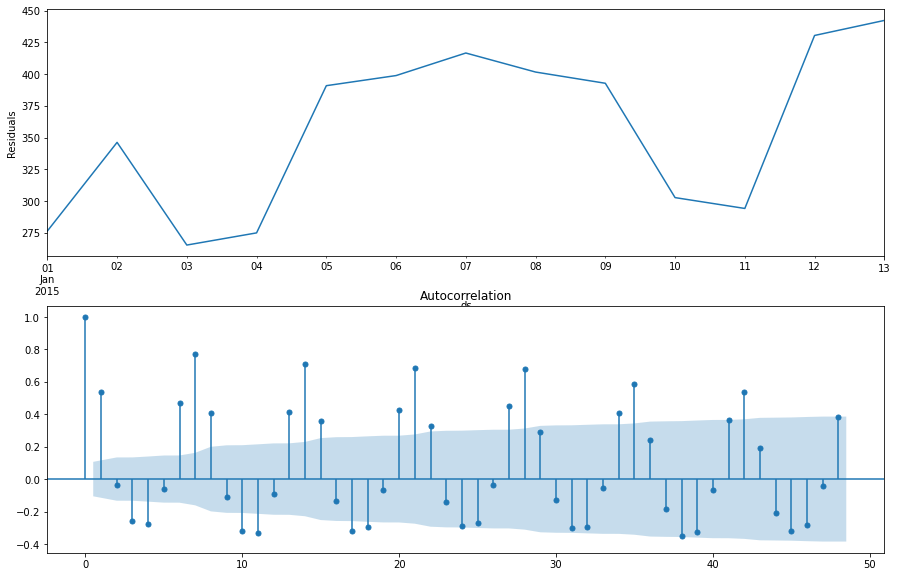

In [34]:
plt.subplot(211)
best_model.resid[:13].plot()
plt.ylabel(u'Residuals')

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)

print("Student's test: p=%f" % stats.ttest_1samp(best_model.resid[13:], 0)[1])
print("Dickey-Fuller test: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

In [37]:
# def invboxcox(y,lmbda):
#     if lmbda==0:
#         return(np.exp(y))
#     else:
#         return(np.exp(np.log(lmbda*y+1)/lmbda))

C:\Users\emely\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [38]:
# train_df['arima_model'] = invboxcox(best_model.fittedvalues, lmbda)

# train_df.y.tail(200).plot()
# train_df.arima_model[13:].tail(200).plot(color='r')
# plt.ylabel('wiki pageviews')